In [6]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gerekli kütüphaneleri içe aktar
import matplotlib.pyplot as plt

# Veri setini yükle
file_path = r"C:\Users\pc\Desktop\ULUDAG-ENERJI-DAGITILAN\data\raw\consumption.xlsx"  # Dosya yolunu kontrol edin
data = pd.read_excel(file_path)
data["datetime"] = pd.to_datetime(
    data["date"].astype(str) + " " + data["time"].astype(str) + ":00:00"
)

# datetime sütununu index olarak ayarla
data.set_index("datetime", inplace=True)

# date ve time sütunlarını kaldır
data.drop(columns=["date", "time"], inplace=True)
data

,consumption
datetime,
2020-01-01 00:00:00,1063.485319
2020-01-01 01:00:00,993.980864
2020-01-01 02:00:00,910.942442
2020-01-01 03:00:00,843.048104
2020-01-01 04:00:00,805.378961
...,...
2025-05-04 19:00:00,1222.287738
2025-05-04 20:00:00,1358.903225
2025-05-04 21:00:00,1359.215946


In [9]:
data  # Veri seti hakkında genel bilgi
print(data.info())
# Eksik değerleri kontrol et
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46824 entries, 2020-01-01 00:00:00 to 2025-05-04 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  46824 non-null  float64
dtypes: float64(1)
memory usage: 731.6 KB
None
consumption    0
dtype: int64


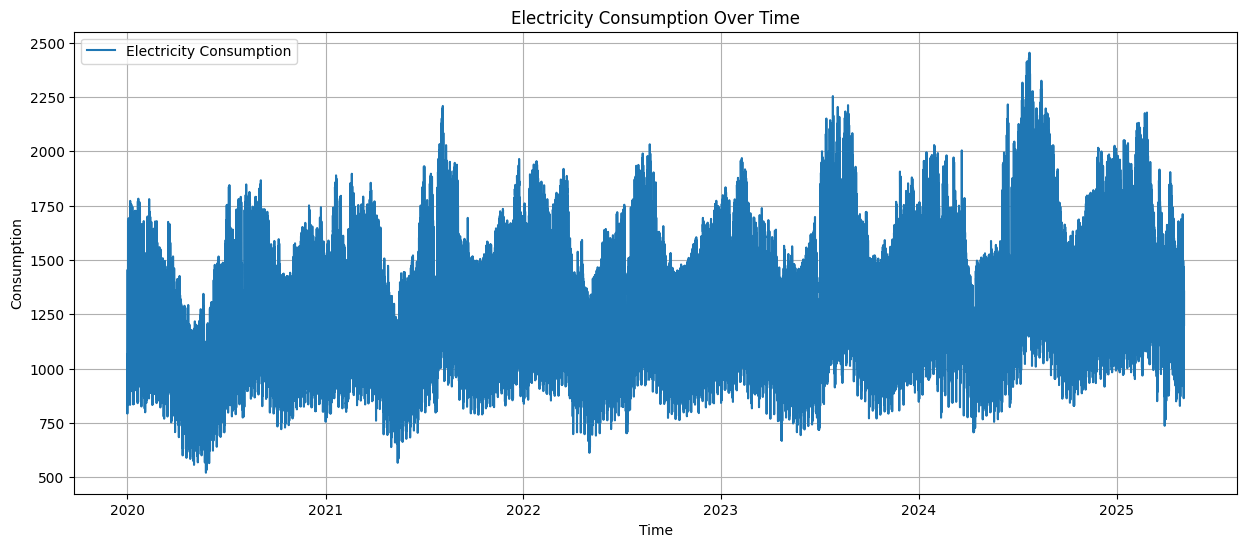

In [10]:
# Zaman serisini görselleştir
plt.figure(figsize=(15, 6))
plt.plot(data.index, data["consumption"], label="Electricity Consumption")
plt.title("Electricity Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Consumption")
plt.legend()
plt.grid()
plt.show()

In [11]:
# İstatistiksel özet
print(data.describe())

        consumption
count  46824.000000
mean    1309.390300
std      310.491619
min      521.322508
25%     1044.744932
50%     1317.313844
75%     1530.110231
max     2453.377587


C:\Users\pc\AppData\Local\Temp\ipykernel_5184\1716240261.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['consumption'].resample('M').mean()


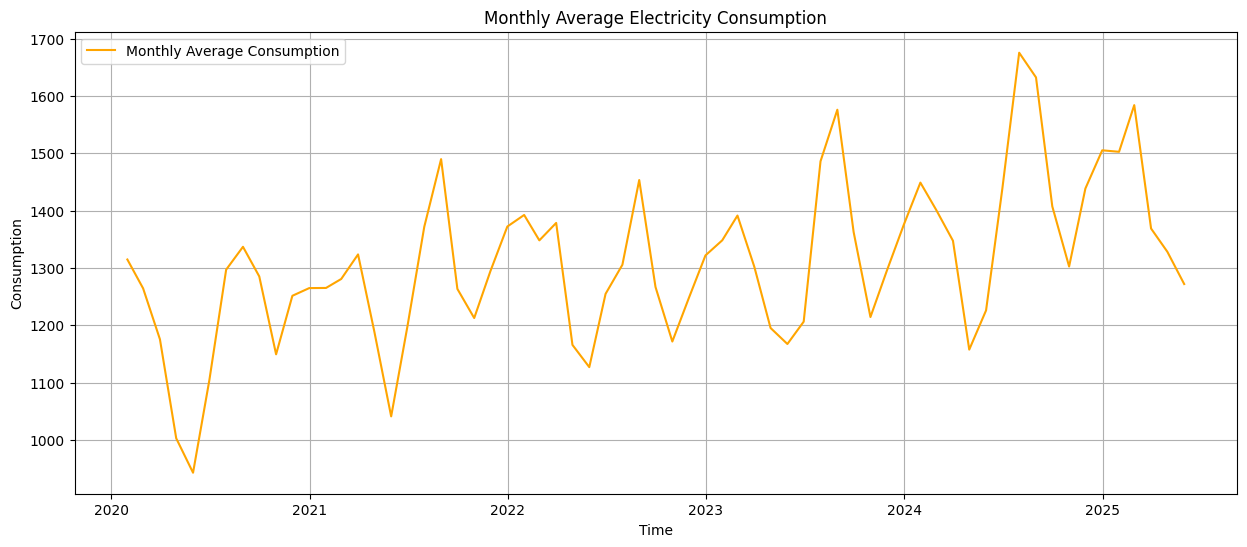

In [12]:
# Aylık ortalama tüketim
monthly_avg = data["consumption"].resample("M").mean()
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg, label="Monthly Average Consumption", color="orange")
plt.title("Monthly Average Electricity Consumption")
plt.xlabel("Time")
plt.ylabel("Consumption")
plt.legend()
plt.grid()
plt.show()

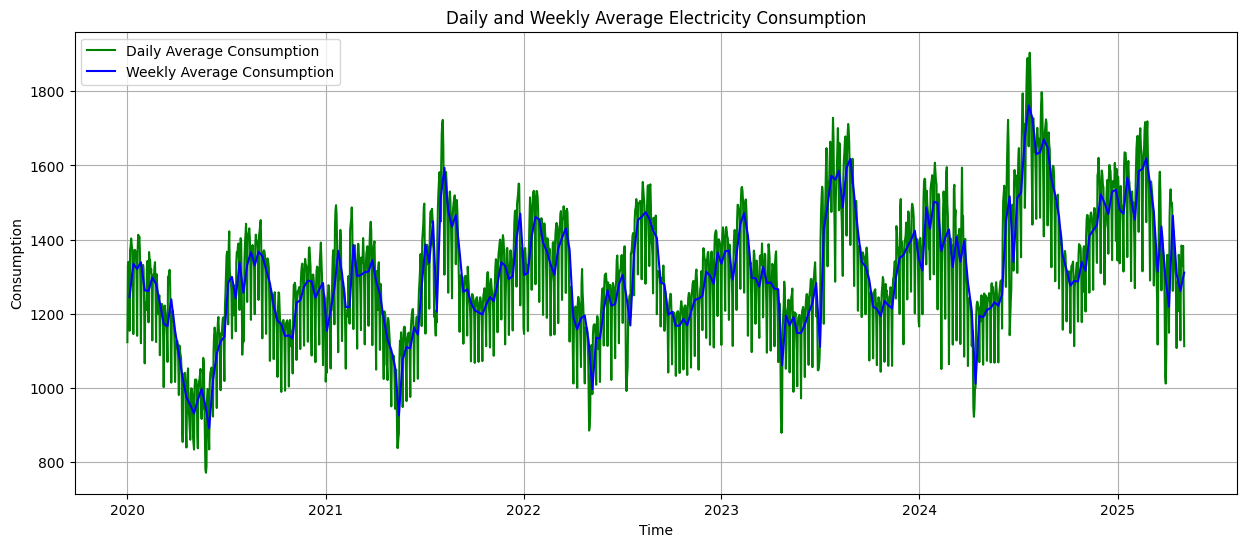

In [13]:
# Günlük ve haftalık desenleri incele
daily_avg = data["consumption"].resample("D").mean()
weekly_avg = data["consumption"].resample("W").mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_avg, label="Daily Average Consumption", color="green")
plt.plot(weekly_avg, label="Weekly Average Consumption", color="blue")
plt.title("Daily and Weekly Average Electricity Consumption")
plt.xlabel("Time")
plt.ylabel("Consumption")
plt.legend()
plt.grid()
plt.show()

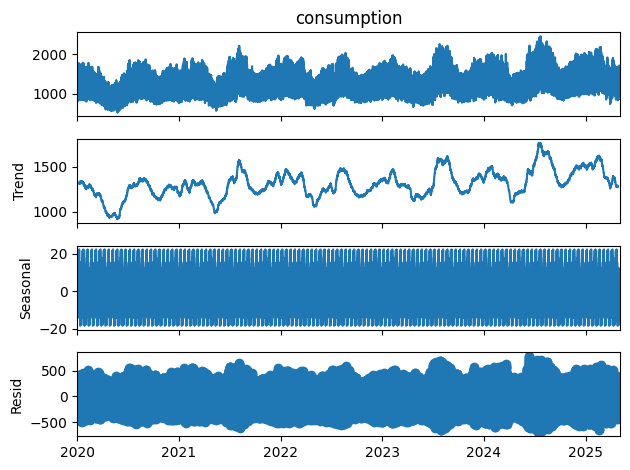

In [14]:
# Mevsimsellik, trend ve rastgele bileşenlerin ayrıştırılması
decomposition = seasonal_decompose(data["consumption"], model="additive", period=365)
decomposition.plot()
plt.show()

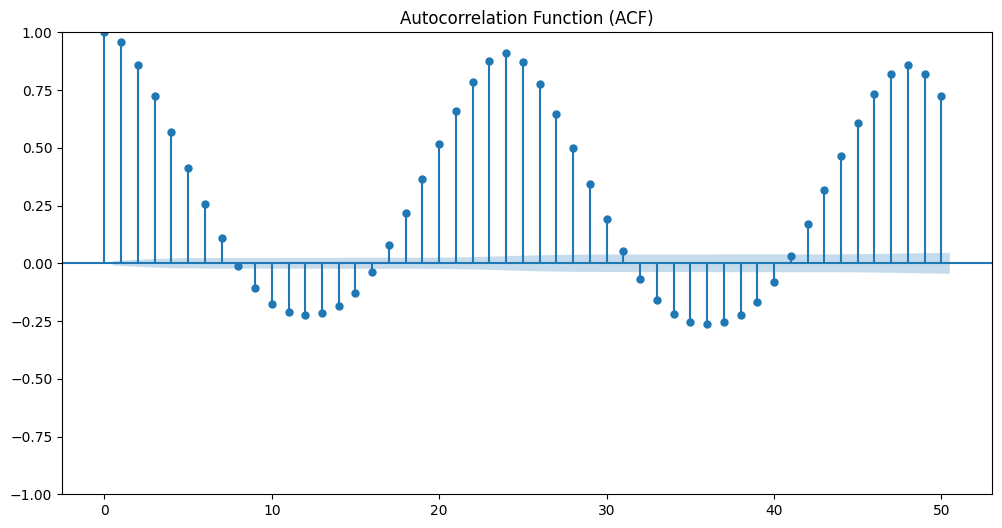

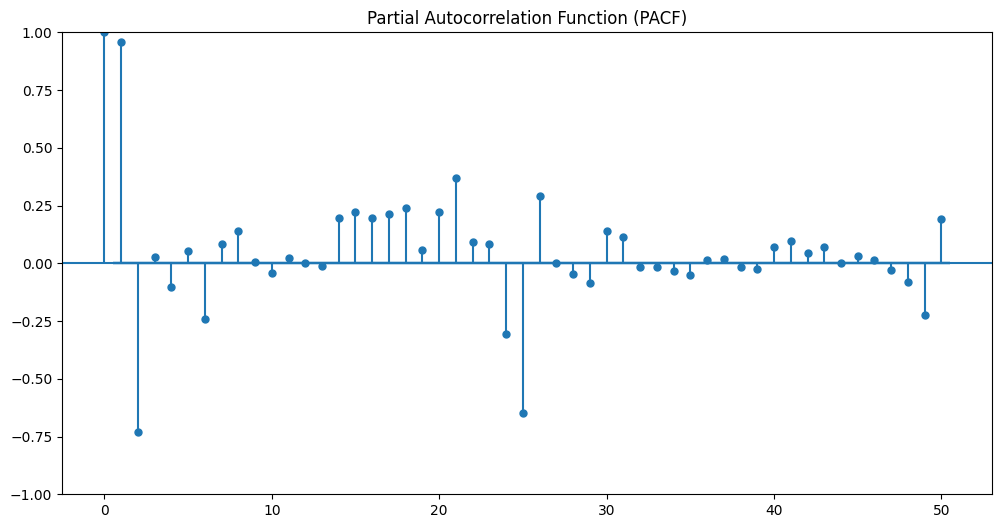

In [15]:
# ACF ve PACF grafikleri

plt.figure(figsize=(12, 6))
plot_acf(data["consumption"].dropna(), lags=50, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data["consumption"].dropna(), lags=50, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

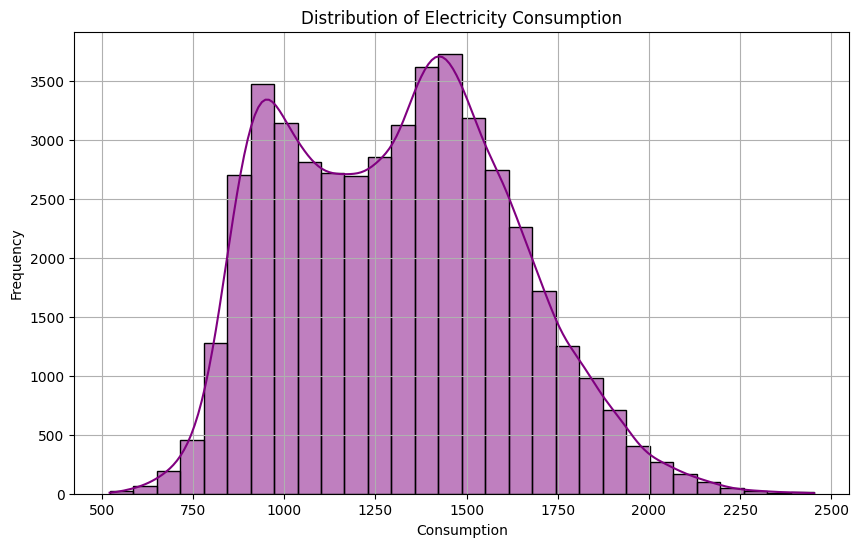

In [16]:
# Tüketim verisinin dağılımını incele
plt.figure(figsize=(10, 6))
sns.histplot(data["consumption"], kde=True, bins=30, color="purple")
plt.title("Distribution of Electricity Consumption")
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.grid()
plt.show()

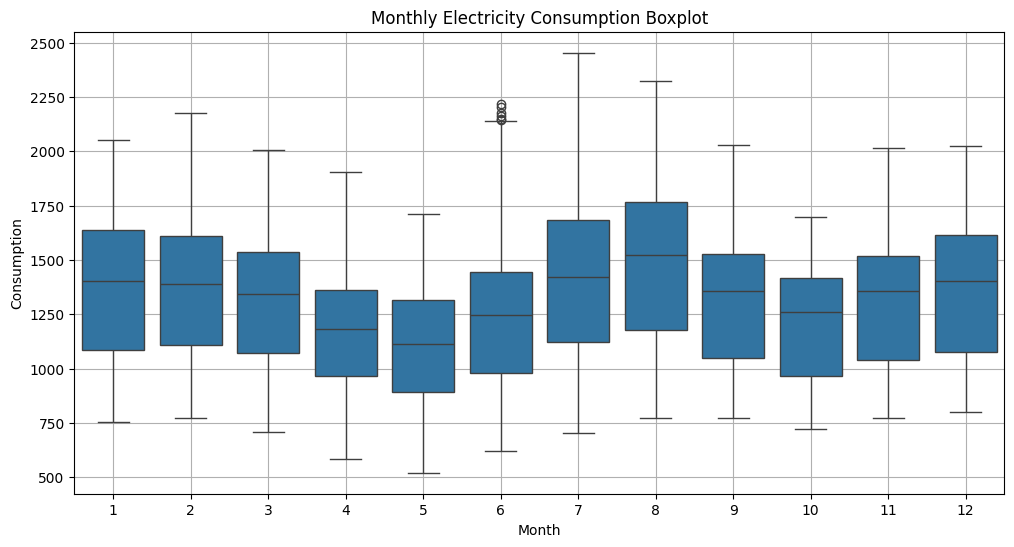

In [17]:
# Zaman serisi verisinin kutu grafiği ile analizi (aylık)
data["month"] = data.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x="month", y="consumption", data=data)
plt.title("Monthly Electricity Consumption Boxplot")
plt.xlabel("Month")
plt.ylabel("Consumption")
plt.grid()
plt.show()